In [1]:
import polars as pl
import pandas as pd
import plotnine as p9
import numpy as np

### Data
```python
y = x**2
```
### Regression
```python
Y = 6x - 5
```

In [2]:
df = pl.DataFrame({'x':[0,1,2,3,4,5,6]})
df = df.with_columns( pl.Series("y", [ x**2 for x in df.get_column('x')]) )
df = df.with_columns( pl.Series("Y", [ x*6-5 for x in df.get_column('x')]) )
print(df)

shape: (7, 3)
┌─────┬─────┬─────┐
│ x   ┆ y   ┆ Y   │
│ --- ┆ --- ┆ --- │
│ i64 ┆ i64 ┆ i64 │
╞═════╪═════╪═════╡
│ 0   ┆ 0   ┆ -5  │
│ 1   ┆ 1   ┆ 1   │
│ 2   ┆ 4   ┆ 7   │
│ 3   ┆ 9   ┆ 13  │
│ 4   ┆ 16  ┆ 19  │
│ 5   ┆ 25  ┆ 25  │
│ 6   ┆ 36  ┆ 31  │
└─────┴─────┴─────┘


In [3]:
df2 = pl.concat( [df.select(['x', 'y']), df.select(['x','Y']).rename({'Y':'y'})] )
df2 = df2.with_columns( pl.Series( 'gg', list( 'a'*df.shape[0] + 'b'*df.shape[0] ) ) )
print(df2)

shape: (14, 3)
┌─────┬─────┬─────┐
│ x   ┆ y   ┆ gg  │
│ --- ┆ --- ┆ --- │
│ i64 ┆ i64 ┆ str │
╞═════╪═════╪═════╡
│ 0   ┆ 0   ┆ a   │
│ 1   ┆ 1   ┆ a   │
│ 2   ┆ 4   ┆ a   │
│ 3   ┆ 9   ┆ a   │
│ 4   ┆ 16  ┆ a   │
│ …   ┆ …   ┆ …   │
│ 2   ┆ 7   ┆ b   │
│ 3   ┆ 13  ┆ b   │
│ 4   ┆ 19  ┆ b   │
│ 5   ┆ 25  ┆ b   │
│ 6   ┆ 31  ┆ b   │
└─────┴─────┴─────┘


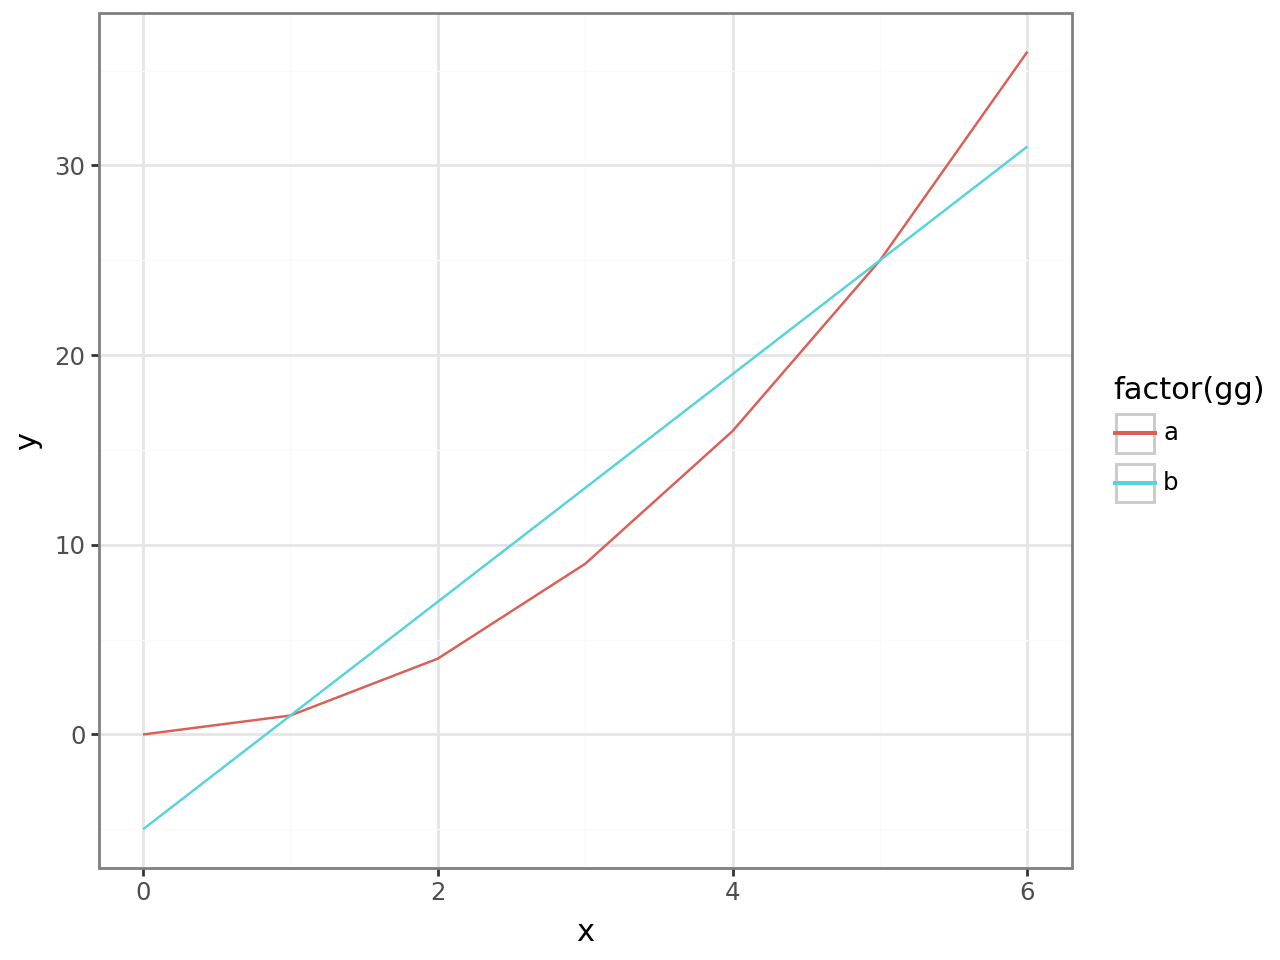

In [4]:
( p9.ggplot(data=df2,
            mapping=p9.aes(x='x', y='y', color='factor(gg)')) 
+ p9.geom_line()
+ p9.theme_bw()
)